# Results for training $\epsilon$-DP Logistic Regression models

In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
import pickle
import scipy.stats as st
import seaborn as sns

In [2]:
experiment_path = '../../experiments/dp_target_attack'
nbrs_columns = [3, 4, 5]
epsilons = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
methods = ['model_predictions', 'uniform_prior_empirical']

In [3]:
def get_results_dp_incr_n(nbrs_columns, experiment_path, epsilons, methods, verbose=False):
    randomized_target_results = {n: 
                                 {epsilon: [] for epsilon in epsilons} 
                                 for n in nbrs_columns}

    for n in nbrs_columns:
        for epsilon in epsilons:
            path = f'{experiment_path}/cols-{n}/column/' + \
                f'seed_False_nt-1000_ns-5000_nds-1000_tts-0.333333_sts-0_ndsbb-100' + \
                f'_smt-logregdp_eps-{epsilon}_mmt-logreg_nb-3_sgf--1.pickle'
            if not os.path.exists(path):
                break
            with open(path, 'rb') as f:
                saved_result = pickle.load(f)
            if verbose:
                print(f'Found results for {path}...')
            randomized_target_results[n][epsilon] = saved_result
    
        print(f'Found {len(randomized_target_results[n])} results for nbr_columns={n}\n')
        
    attack_accuracy = {method: 
                {n: 
                 OrderedDict({epsilon: result['accuracy'][method] for epsilon, result in results_n.items()})
                 for n, results_n in randomized_target_results.items()} 
                for method in methods}
    model_utility = {
        n: OrderedDict({epsilon: result['accs_target_test'] for epsilon, result in results_n.items()})
                 for n, results_n in randomized_target_results.items()
    }
    return attack_accuracy, model_utility

In [4]:
attack_accuracy, model_utility = get_results_dp_incr_n(nbrs_columns, experiment_path, epsilons, methods)

Found 13 results for nbr_columns=3

Found 13 results for nbr_columns=4

Found 13 results for nbr_columns=5



In [5]:
print(attack_accuracy)
#print(model_utility[3].values())

{'model_predictions': {3: OrderedDict([(0.01, 0.514), (0.02, 0.521), (0.05, 0.543), (0.1, 0.577), (0.2, 0.658), (0.5, 0.806), (1.0, 0.875), (2.0, 0.915), (5.0, 0.944), (10.0, 0.949), (20.0, 0.948), (50.0, 0.95), (100.0, 0.951)]), 4: OrderedDict([(0.01, 0.526), (0.02, 0.512), (0.05, 0.521), (0.1, 0.569), (0.2, 0.614), (0.5, 0.7), (1.0, 0.772), (2.0, 0.816), (5.0, 0.854), (10.0, 0.848), (20.0, 0.861), (50.0, 0.859), (100.0, 0.863)]), 5: OrderedDict([(0.01, 0.56), (0.02, 0.524), (0.05, 0.51), (0.1, 0.53), (0.2, 0.586), (0.5, 0.653), (1.0, 0.682), (2.0, 0.715), (5.0, 0.738), (10.0, 0.75), (20.0, 0.748), (50.0, 0.747), (100.0, 0.753)])}, 'uniform_prior_empirical': {3: OrderedDict([(0.01, 0.486), (0.02, 0.486), (0.05, 0.486), (0.1, 0.486), (0.2, 0.486), (0.5, 0.486), (1.0, 0.486), (2.0, 0.486), (5.0, 0.486), (10.0, 0.486), (20.0, 0.486), (50.0, 0.486), (100.0, 0.486)]), 4: OrderedDict([(0.01, 0.502), (0.02, 0.502), (0.05, 0.502), (0.1, 0.502), (0.2, 0.502), (0.5, 0.502), (1.0, 0.502), (2.0, 

Model utility
epsilon=0.01, acc=52.0%
epsilon=0.02, acc=53.3%
epsilon=0.05, acc=56.5%
epsilon=0.1, acc=61.4%
epsilon=0.2, acc=67.0%
epsilon=0.5, acc=73.3%
epsilon=1.0, acc=75.7%
epsilon=2.0, acc=76.7%
epsilon=5.0, acc=77.1%
epsilon=10.0, acc=77.1%
epsilon=20.0, acc=77.1%
epsilon=50.0, acc=77.1%
epsilon=100.0, acc=77.1%
Model utility
epsilon=0.01, acc=51.2%
epsilon=0.02, acc=53.2%
epsilon=0.05, acc=55.7%
epsilon=0.1, acc=61.5%
epsilon=0.2, acc=68.2%
epsilon=0.5, acc=76.2%
epsilon=1.0, acc=79.5%
epsilon=2.0, acc=81.4%
epsilon=5.0, acc=82.3%
epsilon=10.0, acc=82.4%
epsilon=20.0, acc=82.5%
epsilon=50.0, acc=82.4%
epsilon=100.0, acc=82.4%
Model utility
epsilon=0.01, acc=51.6%
epsilon=0.02, acc=52.8%
epsilon=0.05, acc=56.4%
epsilon=0.1, acc=61.2%
epsilon=0.2, acc=68.6%
epsilon=0.5, acc=76.6%
epsilon=1.0, acc=80.9%
epsilon=2.0, acc=84.0%
epsilon=5.0, acc=85.7%
epsilon=10.0, acc=86.0%
epsilon=20.0, acc=86.1%
epsilon=50.0, acc=86.1%
epsilon=100.0, acc=86.1%


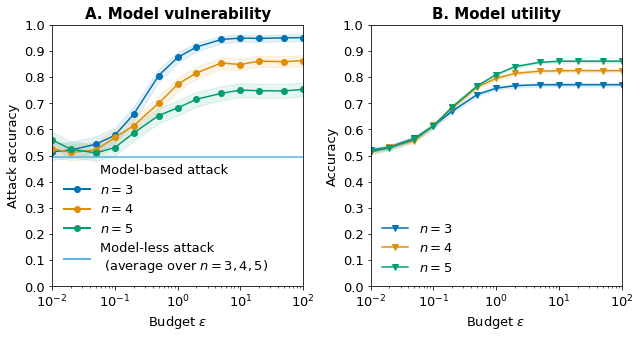

In [6]:
titles = ['A. Model vulnerability', 'B. Model utility']
ylabels = ['Attack accuracy', 'Accuracy']
colors = np.array([c for c in sns.color_palette("colorblind", 10)])

fig, axes = plt.subplots(1, 2, figsize=(9, 4.8))

for i, n in enumerate(nbrs_columns):
    # Model-based attack.
    y = np.array(list(attack_accuracy['model_predictions'][n].values()))
    axes[0].plot(epsilons, y, color=colors[i], marker='o')
    y_error = np.array([1.96 * np.sqrt(1/1000 * acc * (1- acc)) for acc in y])
    axes[0].fill_between(epsilons, y-y_error, y+y_error, alpha=0.1, color=colors[i])
    
    # Model utility.
    y, y_lower, y_upper = [], [], []
    print('Model utility')
    for epsilon in epsilons:
        accs = model_utility[n][epsilon]
        acc_mean = np.mean(accs)
        y.append(acc_mean)
        lower, upper = st.t.interval(alpha=0.95, df=len(accs)-1, loc=acc_mean, scale=st.sem(accs))
        y_lower.append(lower)
        y_upper.append(upper)
        print(f'epsilon={epsilon}, acc={acc_mean:.1%}')
    axes[1].plot(epsilons, y, color=colors[i], marker='v', label=f'$n={n}$')
    
    axes[1].fill_between(epsilons, y_lower, y_upper, alpha=0.1, color=colors[i])
    
# Model-less attack.
y = np.mean([list(attack_accuracy['uniform_prior_empirical'][n].values()) for n in nbrs_columns])
axes[0].axhline(y=y, color=colors[9])
    
for i, ax in enumerate(axes):
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlim(0.01, 100)
    ax.set_xscale('log')
    ax.set_xlabel(r'Budget $\epsilon$', fontsize=13)
    
    ax.set_ylim(0, 1)
    yticks = np.arange(0, 1.01, 0.1)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{t:.1f}' for t in yticks], fontsize=13)
    ax.set_ylabel(ylabels[i], fontsize=13)
    ax.set_title(titles[i], fontsize=15, fontweight='bold')
    
custom_lines = [Line2D([], [],  lw=0),
                Line2D([0], [0], color=colors[0], lw=2, marker='o'),
                Line2D([0], [0], color=colors[1], lw=2, marker='o'),
                Line2D([0], [0], color=colors[2], lw=2, marker='o'),
                Line2D([0], [0], color=colors[9], lw=2)]
custom_names = ['Model-based attack',
                '$n = 3$', 
                '$n = 4$', 
                '$n = 5$', 
                'Model-less attack \n (average over $n=3,4,5$)']
axes[0].legend(custom_lines, custom_names, fontsize=13, frameon=False)

axes[1].legend(fontsize=13, frameon=False, loc='lower left')

plt.tight_layout()
plt.savefig(f'../../plots/dp_logreg.pdf', bbox_inches='tight')
plt.savefig(f'../../plots/dp_logreg.png', bbox_inches='tight')
plt.show()